In [1]:
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [186]:
movie_df = pd.read_csv('../data/tmdb_5000_movies.csv')
credits_df = pd.read_csv('../data/tmdb_5000_credits.csv')

In [284]:
df

,id,title_x,original_language,spoken_languages,genres,keywords,overview,production_companies,production_countries,year,...,revenue,budget,runtime,popularity,has_homepage,cast,crew,vote_count,vote_average,profit
0,19995,avatar,en,"[en, es]","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009.0,...,2787965087,237000000,162.0,150.437577,1,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[James Cameron, James Cameron, James Cameron, ...",11800,7.2,2550965087
1,285,pirates of the caribbean: at world's end,en,[en],"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007.0,...,961000000,300000000,169.0,139.082615,1,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Eric McLeo...",4500,6.9,661000000
2,206647,spectre,en,"[fr, en, es, it, de]","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015.0,...,880674609,245000000,148.0,107.376788,1,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, Barbara Broccoli, Michael G. Wilson]",4466,6.3,635674609
3,49026,the dark knight rises,en,[en],"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012.0,...,1084939099,250000000,165.0,112.312950,1,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Christopher...",9106,7.6,834939099
4,49529,john carter,en,[en],"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",[Walt Disney Pictures],[United States of America],2012.0,...,284139100,260000000,132.0,43.926995,1,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Colin Wilson, Jim Morris, Lin...",2124,6.1,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,el mariachi,es,[es],"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi just wants to play his guitar and ...,[Columbia Pictures],"[Mexico, United States of America]",1992.0,...,2040920,220000,81.0,14.269792,0,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Robert Rodriguez, Robert Rodriguez, Carlos Ga...",238,6.6,1820920
4799,72766,newlyweds,en,[],"[Comedy, Romance]",[],A newlywed couple's honeymoon is upended by th...,[],[],2011.0,...,51751835,9000,85.0,0.642552,0,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[Edward Burns, Edward Burns, Edward Burns, Wil...",5,5.9,51742835
4800,231617,"signed, sealed, delivered",en,[en],"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","""Signed, Sealed, Delivered"" introduces a dedic...","[Front Street Pictures, Muse Entertainment Ent...",[United States of America],2013.0,...,51751835,23000000,120.0,1.444476,1,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[Harvey Kahn, Martha Williamson, Scott Smith]",6,7.0,28751835
4801,126186,shanghai calling,en,[en],[],[],When ambitious New York attorney Sam is sent t...,[],"[United States of America, China]",2012.0,...,51751835,23000000,98.0,0.857008,1,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...","[Daniel Hsia, Daniel Hsia]",7,5.7,28751835


In [187]:
df = pd.merge(movie_df, credits_df, left_on = 'id', right_on = 'movie_id')
raw_dataset = df.copy()

# data exploration

In [188]:
# Shape of the dataset
shape = df.shape

# Data types of the columns
data_types = df.dtypes

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics of the numerical columns
descriptive_stats = df.describe()

# Count of unique values for each column
unique_counts = df.nunique()

In [179]:
shape, data_types, missing_values, descriptive_stats, unique_counts

((4803, 24),
 budget                    int64
 genres                   object
 homepage                 object
 id                        int64
 keywords                 object
 original_language        object
 original_title           object
 overview                 object
 popularity              float64
 production_companies     object
 production_countries     object
 release_date             object
 revenue                   int64
 runtime                 float64
 spoken_languages         object
 status                   object
 tagline                  object
 title_x                  object
 vote_average            float64
 vote_count                int64
 movie_id                  int64
 title_y                  object
 cast                     object
 crew                     object
 dtype: object,
 budget                     0
 genres                     0
 homepage                3091
 id                         0
 keywords                   0
 original_language          0

* Count of empty lists for each column

In [210]:
empty_list_counts = {}

for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, list)).any():
        empty_list_counts[column] = sum(df[column].apply(lambda x: len(x) == 0))

for column, count in empty_list_counts.items():
    print(f"Column '{column}' has {count} empty lists.")

Column 'spoken_languages' has 85 empty lists.
Column 'genres' has 27 empty lists.
Column 'keywords' has 411 empty lists.
Column 'production_companies' has 350 empty lists.
Column 'production_countries' has 173 empty lists.
Column 'cast' has 42 empty lists.
Column 'crew' has 28 empty lists.


In [189]:
df.shape

(4803, 24)

# Data Cleaning

In [190]:
def has_http(value):
    if isinstance(value, str) and 'http' in value:
        return 1
    else:
        return 0


df.loc[:, 'has_homepage'] = df['homepage'].apply(lambda x: has_http(x))
del df['homepage']

- Standardize Text Data and datetime and Normalization and Scaling

In [191]:
df["release_date"] = pd.to_datetime(df["release_date"])

# Extract year, month, day, and day of week
df["year"] = df["release_date"].dt.year
df["month"] = df["release_date"].dt.month
df["day"] = df["release_date"].dt.day
df["dow"] = df["release_date"].dt.dayofweek

In [192]:
df['title_x'] = df['title_x'].str.lower()  # Convert titles to lowercase

df['popularity_normal'] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())

In [161]:
#keep only released movies
# df = df[df['status'] == 'Released']
# del df['status']

- handling missing values

In [193]:
from sklearn.impute import SimpleImputer

runtime_median = df[df['runtime'] != 0]['runtime'].median()

# Replace NaN with the median
imputer_med = SimpleImputer(strategy='constant', fill_value=runtime_median)
df['runtime'] = imputer_med.fit_transform(df[['runtime']])

# Replace 0 values with the median
df.loc[df['runtime'] == 0, 'runtime'] = runtime_median


In [194]:
budget_median = df[df['budget'] != 0]['budget'].median()

# Replace 0 values with the median
df.loc[df['budget'] < 100, 'budget'] = budget_median

In [195]:
revenue_median = df[df['revenue'] != 0]['revenue'].median()

# Replace 0 values with the median
df.loc[df['revenue'] < 60, 'revenue'] = revenue_median

In [196]:
# Filter out zeros
filtered_column = df[df['vote_average'] != 0]['vote_average']  
mode_without_zeros = filtered_column.mode()[0]

df.loc[df['vote_average'] == 0, 'vote_average'] = mode_without_zeros

In [197]:
# Filter out zeros
filtered_column = df[df['vote_count'] != 0]['vote_count']  
mode_without_zeros = filtered_column.mode()[0]

df.loc[df['vote_count'] == 0, 'vote_count'] = mode_without_zeros

- replacing overviews where is none

In [203]:
df.loc[df['id'] == 370980, 'overview'] = 'Following the rise of father Jorge Mario Bergoglio from his early life as a teacher in a Jesuit High School in Argentina, to archbishop and cardinal of Buenos Aires, until he was elected Pope of the Roman Catholic Church.'

df.loc[df['id'] == 459488, 'overview'] = 'An exploration of how singer and actor Frank Sinatra became one of the biggest stars of the 20th century while remaining, in his heart, a normal person.'


In [204]:
df.drop_duplicates(inplace=True)

df.drop(
    columns=['release_date', 'status', 'original_title', 'tagline', 'movie_id',
             'title_y'], inplace=True)

df = df.reindex(
    columns=['id', 'title_x', 'original_language', 'spoken_languages', 'genres',
             'keywords', 'overview', 'production_companies', 'production_countries', 'year',
             'month', 'day', 'dow', 'revenue', 'budget', 'runtime',
             'popularity', 'has_homepage', 'cast', 'crew', 'vote_count',
             'vote_average', 'profit'])

In [205]:
df = df[df['id'] != 380097]

~ Dealing with JSON Fields

In [206]:
# Parsing the genres column from JSON format
df['genres'] = df['genres'].apply(
    lambda x: [genre['name'] for genre in json.loads(x)])

df['keywords'] = df['keywords'].apply(
    lambda x: [key['name'] for key in json.loads(x)])

df['production_companies'] = df['production_companies'].apply(
    lambda x: [company['name'] for company in json.loads(x)])

df['production_countries'] = df['production_countries'].apply(
    lambda x: [country['name'] for country in json.loads(x)])

df['spoken_languages'] = df['spoken_languages'].apply(
    lambda x: [language['iso_639_1'] for language in json.loads(x)])

In [207]:
def json_convert(obj):
    l=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=10:
            l.append(i['name'])
            counter+=1
        else:
            break
    return l

df['cast']=df['cast'].apply(json_convert)

In [208]:
def fetch_crew(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director' or i['job']=='Writer' or i['job']=='Producer':
            l.append(i['name'])
    return l


df['crew']=df['crew'].apply(fetch_crew)

+ creating Profit column

In [214]:
df['profit'] = df['revenue'] - df['budget']

# visualizitaion

C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\3517913182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette=current_palette )
C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\3517913182.py:6: UserWarning: 
The palette list has fewer values (10) than needed (87) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=language_counts.index, y=language_counts.values, palette=current_palette )


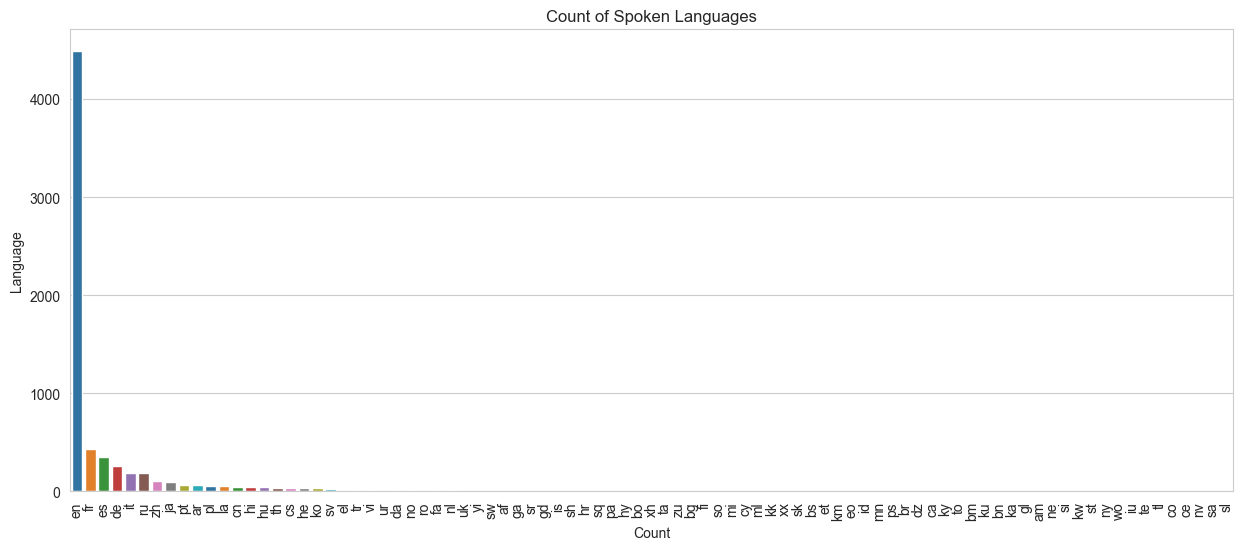

In [244]:
# Count the occurrences of each language
language_counts = df['spoken_languages'].explode().value_counts()

current_palette = sns.color_palette() 
plt.figure(figsize=(15, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette=current_palette )
plt.title('Count of Spoken Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.xticks(rotation=90)
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\698886890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="original_language", data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\698886890.py:2: UserWarning: 
The palette list has fewer values (10) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="original_language", data=df, palette=current_palette)


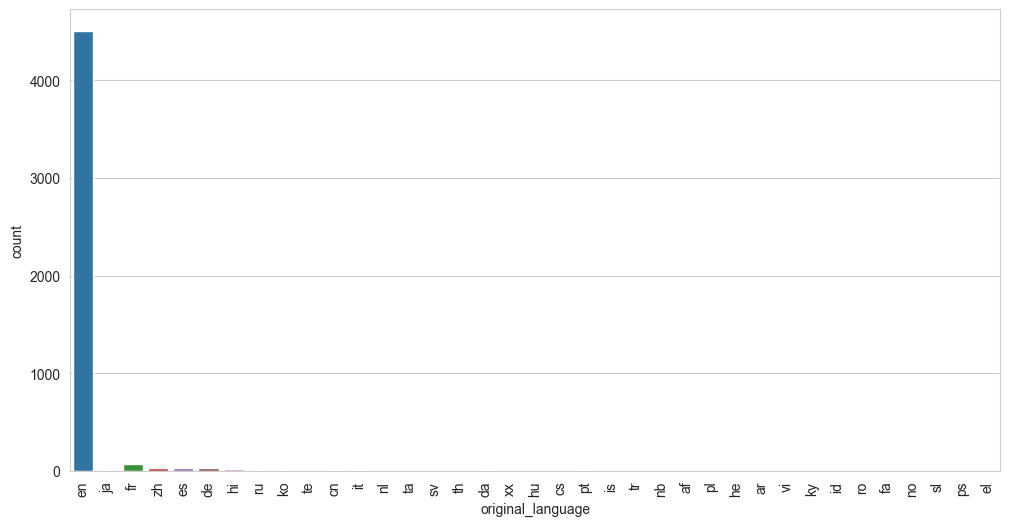

In [245]:
plt.figure(figsize=(12, 6))
sns.countplot(x="original_language", data=df, palette=current_palette)
plt.xticks(rotation=90)
plt.show()

~ Correlation Heatmap

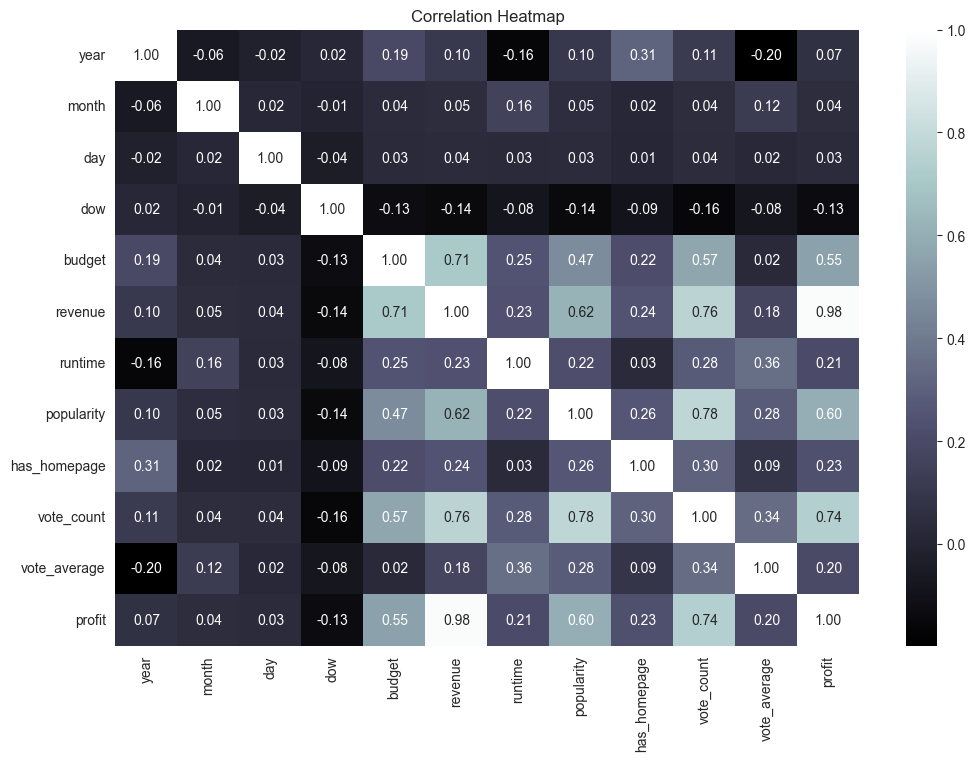

In [246]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['year', 'month', 'day', 'dow', 'budget', 'revenue', 'runtime', 'popularity', 'has_homepage', 'vote_count', 'vote_average','profit']].corr(), annot=True, cmap='bone', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

~ Boxplot

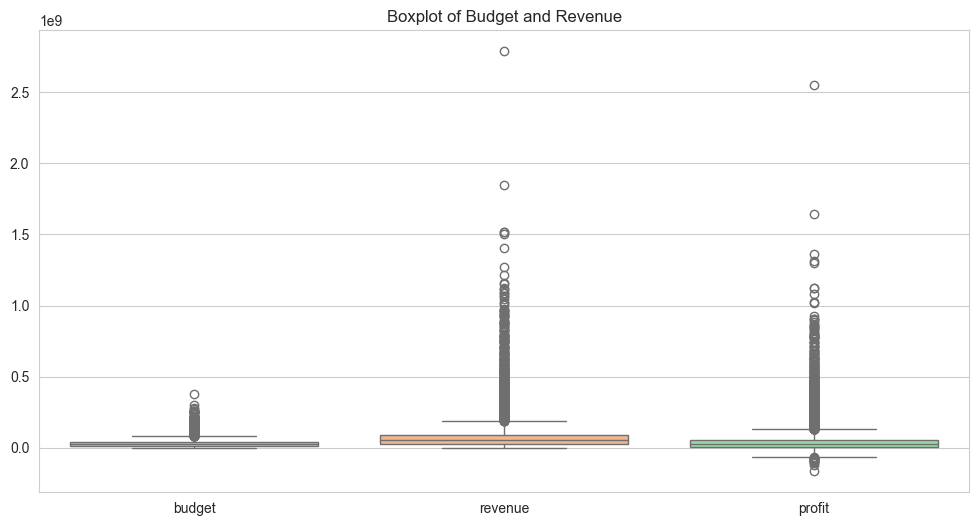

In [247]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['budget', 'revenue', 'profit']], palette='pastel')
plt.title('Boxplot of Budget, Revenue and profit')
plt.show()

~ Bar Plot for Genres

C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\3511931928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='rocket')


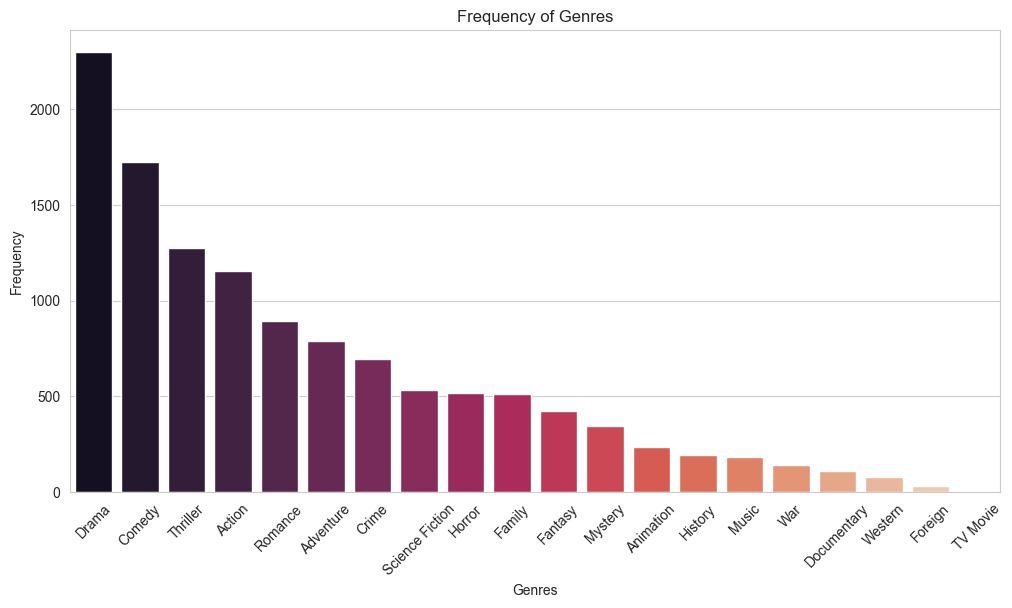

In [248]:
plt.figure(figsize=(12, 6))
genre_counts = df['genres'].explode().value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='rocket')
plt.title('Frequency of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
(plt.xticks
(rotation=45))
plt.show()

~ Bar Plot for Original Language

C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\3950856219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='profit', data=profits_per_year, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\3950856219.py:6: UserWarning: 
The palette list has fewer values (10) than needed (90) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='year', y='profit', data=profits_per_year, palette=current_palette)


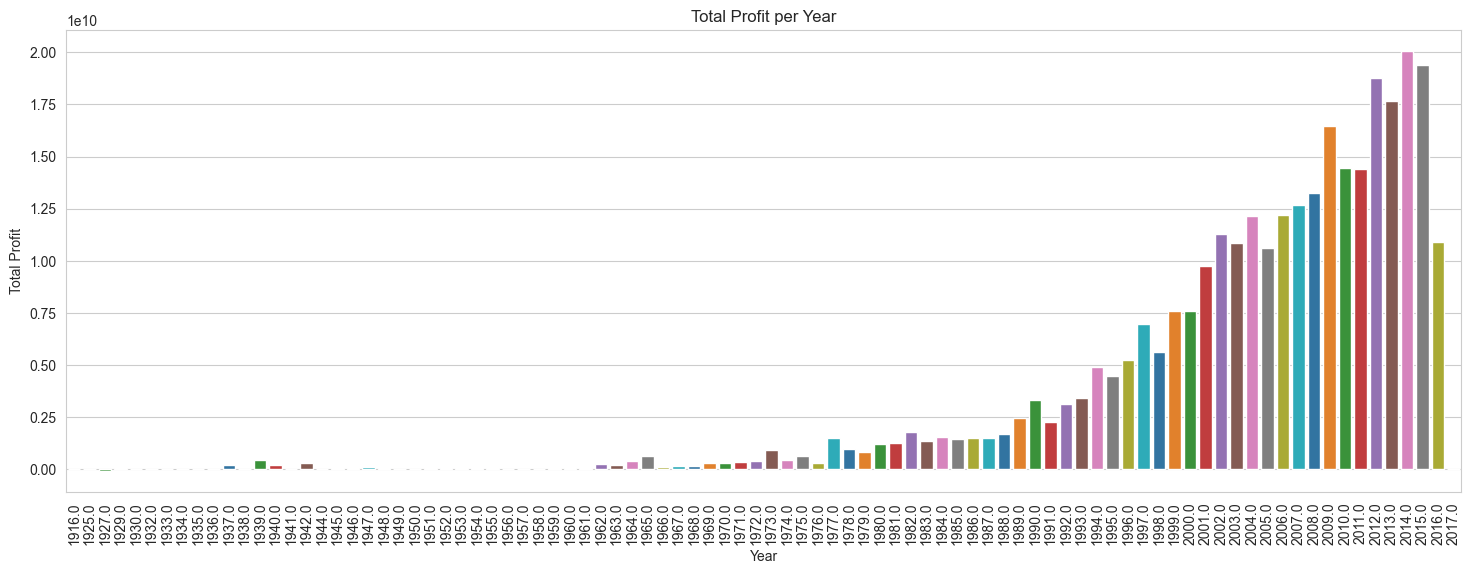

In [250]:
# Group by year and sum profit
profits_per_year = df.groupby("year")["profit"].sum().reset_index()

# Plot the barplot
plt.figure(figsize=(18, 6))
sns.barplot(x='year', y='profit', data=profits_per_year, palette=current_palette)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit per Year')
plt.xticks(rotation=90)
plt.show()

- Day of week release

C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\819902607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days,y='profit',data=profit_by_dow, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12784\819902607.py:3: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x=days,y='profit',data=profit_by_dow, palette=current_palette)


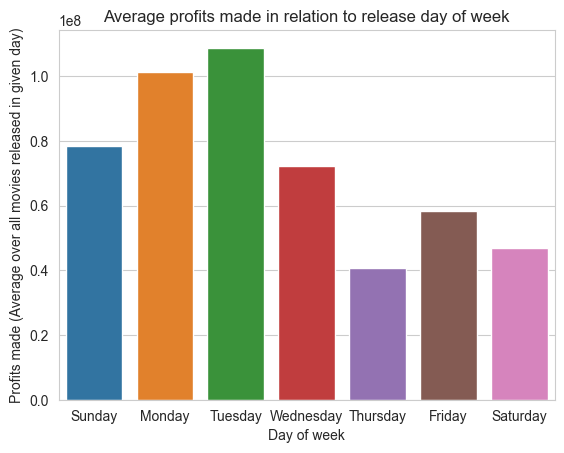

In [286]:
profit_by_dow = df[df["year"]>1990].groupby(["dow"]).profit.mean().reset_index()
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.barplot(x=days,y='profit',data=profit_by_dow, palette=current_palette)
plt.xlabel('Day of week')
plt.ylabel('Profits made (Average over all movies released in given day)')
plt.title('Average profits made in relation to release day of week')
plt.show()

~ Histogram

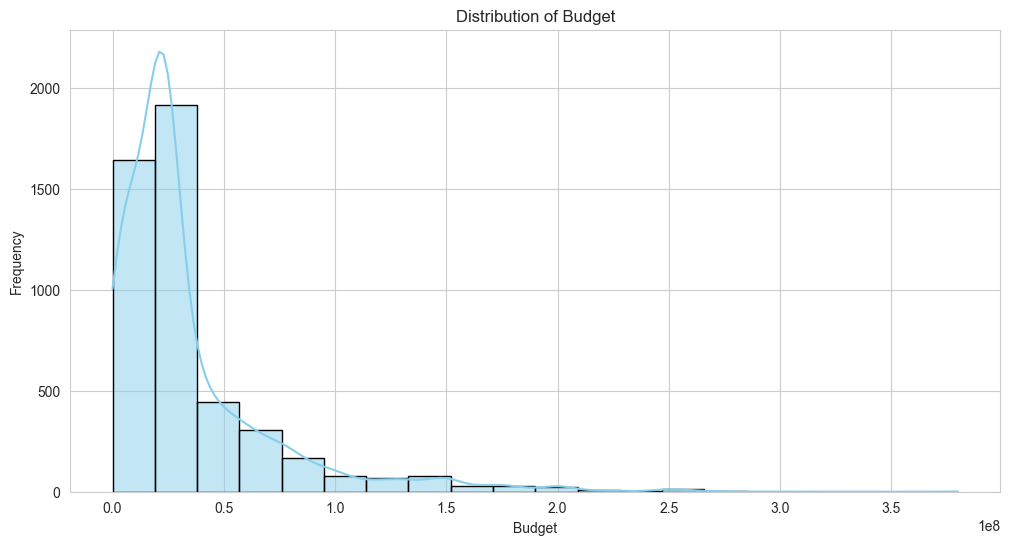

In [285]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='budget', kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

~ Scatter Plot

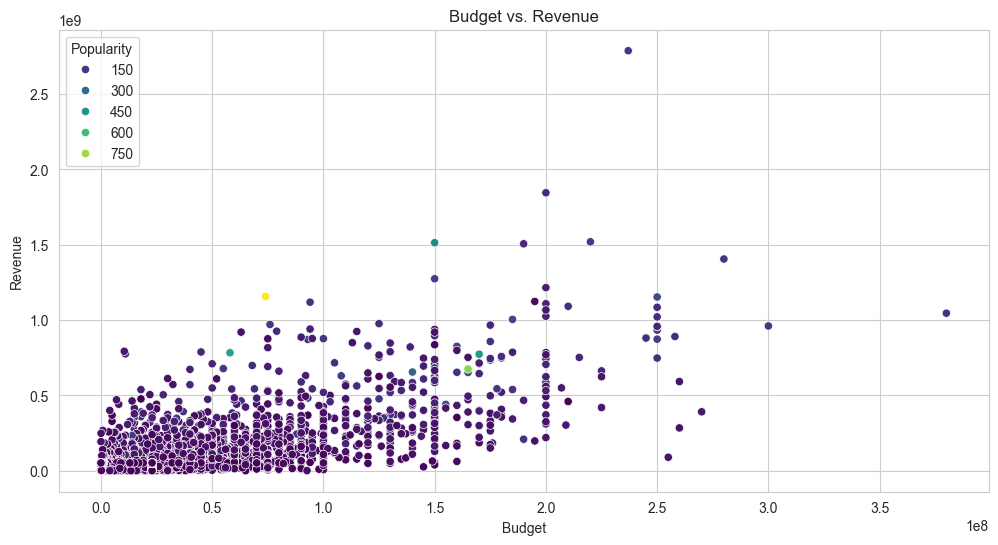

In [253]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='budget', y='revenue', hue='popularity', palette='viridis', legend='brief')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend(title='Popularity', loc='upper left')
plt.show()

locate the movie with the max runtime

In [224]:
max_runtime_id = df["runtime"].idxmax() 
print(df.loc[max_runtime_id][['title_x','runtime','year', 'overview']])

title_x                                                carlos
runtime                                                 338.0
year                                                   2010.0
overview    The story of Venezuelan revolutionary, Ilich R...
Name: 2384, dtype: object


Most popular Movie

In [226]:
pop = df["popularity"].idxmax()
print(df.loc[pop][['title_x','profit','year','vote_average', 'crew']])

title_x                                                   minions
profit                                                 1082730962
year                                                       2015.0
vote_average                                                  6.4
crew            [Christopher Meledandri, Kyle Balda, Janet Hea...
Name: 546, dtype: object


top 10 movies in regards to rating

In [287]:
top = df.nlargest(10,'vote_average')
print('Most voted')
top[['title_x','year','vote_average', 'revenue']]

Most voted


,title_x,year,vote_average,revenue
3519,stiff upper lips,1998.0,10.0,51751835
4045,"dancer, texas pop. 81",1998.0,10.0,565592
4247,me you and five bucks,2015.0,10.0,51751835
4662,little big top,2006.0,10.0,51751835
3992,sardaarji,2015.0,9.5,51751835
2386,one man's hero,1999.0,9.3,51751835
1881,the shawshank redemption,1994.0,8.5,28341469
2970,there goes my baby,1994.0,8.5,123509
2796,the prisoner of zenda,1937.0,8.4,51751835
3337,the godfather,1972.0,8.4,245066411


most profitable movies

In [228]:
most_profits = df.nlargest(10,'profit')
most_profits[['title_x','profit','year','vote_average']]

,title_x,profit,year,vote_average
0,avatar,2550965087,2009.0,7.2
25,titanic,1645034188,1997.0,7.5
28,jurassic world,1363528810,2015.0,6.5
44,furious 7,1316249360,2015.0,7.3
16,the avengers,1299557910,2012.0,7.4
7,avengers: age of ultron,1125403694,2015.0,7.3
124,frozen,1124219009,2013.0,7.3
546,minions,1082730962,2015.0,6.4
329,the lord of the rings: the return of the king,1024888979,2003.0,8.1
31,iron man 3,1015439994,2013.0,6.8


~ Generate word cloud

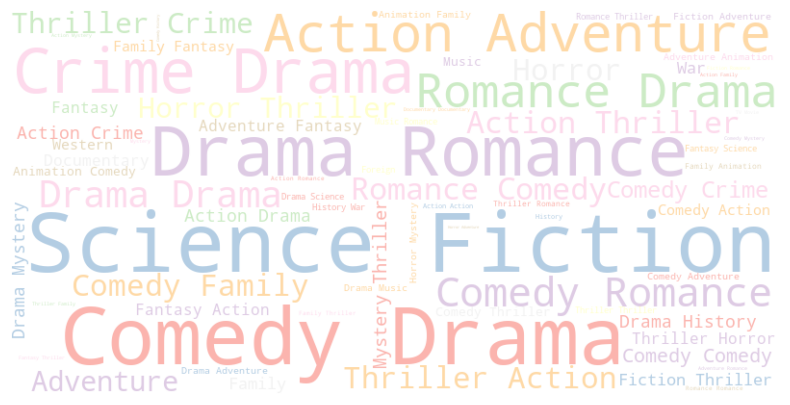

In [254]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genres_list = df['genres'].explode().dropna()

genres_text = ' '.join(genres_list)
wordcloud = WordCloud(width=800, height=400, background_color ='white', colormap='Pastel1').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Model dataset prepration

In [274]:
dataset = df.copy()

In [275]:
dataset.drop(columns=['id', 'title_x', 'original_language',  'genres', 'keywords', 'overview', 'production_companies', 'production_countries' , 'spoken_languages', 'cast', 'crew', 'revenue'], inplace=True)

split profit into 2 class profitable = 1 and unprofitable = 0

In [276]:
def profit_class(value):
    if  value >= 0:
        return 1
    else:
        return 0


dataset.loc[:, 'profit'] = dataset['profit'].apply(lambda x: profit_class(x))

# Machine Learning

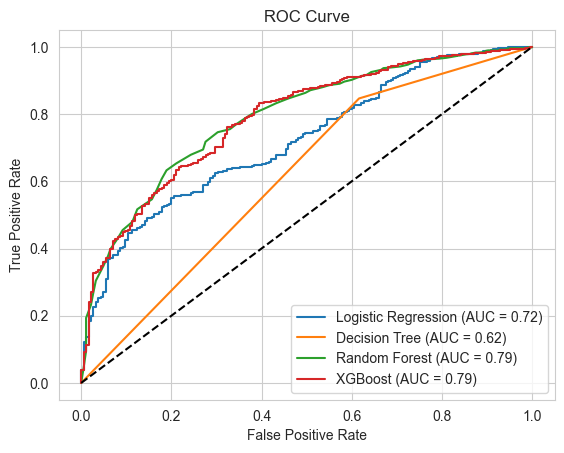

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.811655   0.810867  1.000000  0.895557
Decision Tree        0.757544   0.852140  0.846649  0.849386
Random Forest        0.817898   0.833518  0.967784  0.895647
XGBoost              0.819979   0.852632  0.939433  0.893930

Feature Importance for Decision Tree:
dow: 0.1679
has_homepage: 0.1669
runtime: 0.1281
id: 0.1041
budget: 0.1024
month: 0.0959
vote_average: 0.0913
year: 0.0789
day: 0.0463
popularity: 0.0182

Feature Importance for Random Forest:
has_homepage: 0.1667
runtime: 0.1623
dow: 0.1457
budget: 0.1057
id: 0.1023
vote_average: 0.1003
month: 0.0876
year: 0.0676
day: 0.0445
popularity: 0.0171

Feature Importance for XGBoost:
has_homepage: 0.1642
dow: 0.1401
id: 0.1053
runtime: 0.0935
popularity: 0.0896
budget: 0.0850
year: 0.0836
day: 0.0831
vote_average: 0.0824
month: 0.0731


In [279]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, make_scorer
import matplotlib.pyplot as plt

# Define the target variable
dataset['target'] = dataset['profit']

# Perform feature engineering and select features
# For simplicity, you can choose all numeric features
features = ['year', 'month', 'day', 'dow', 'budget', 'runtime', 'popularity', 'has_homepage', 'vote_count', 'vote_average']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], dataset['target'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models with default hyperparameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define scoring metrics for GridSearchCV
scoring = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score), 
           'recall': make_scorer(recall_score), 
           'f1': make_scorer(f1_score)}

# Train and evaluate models with hyperparameter tuning using GridSearchCV
results = {}
tuned_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid={}, scoring=scoring, refit='accuracy', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    tuned_model = grid_search.best_estimator_
    tuned_models[name] = tuned_model
    y_pred = tuned_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    
    # Plot ROC-AUC curve
    fpr, tpr, _ = roc_curve(y_test, tuned_model.predict_proba(X_test_scaled)[:,1])
    roc_auc = roc_auc_score(y_test, tuned_model.predict_proba(X_test_scaled)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC-AUC curve for all models
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Additional analysis for tree-based models
for name, model in tuned_models.items():
    if name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        print(f"\nFeature Importance for {name}:")
        if hasattr(model, 'feature_importances_'):
            feature_importance = dict(zip(X.columns, model.feature_importances_))
            sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
            for feature, importance in sorted_feature_importance:
                print(f"{feature}: {importance:.4f}")
